In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('setup complete')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# LINEAR REGRESSSION

Regression models describe the relationship between variables by fitting a line to the observed data.

Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

How strong the relationship is between two variables (x and y)
One variable, x, is known as the predictor variable. The other variable, y, is known as the response variable (e.g. the relationship between rainfall and soil erosion).

The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).

Using linear regression, we can find the line that best “fits” our data. This line is known as the least squares regression line and it can be used to help us understand the relationships between weight and height.

ŷ = b0 + b1x

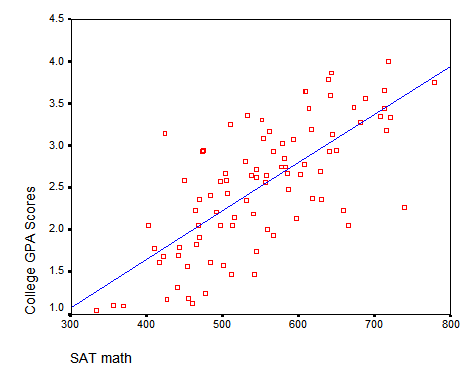



### Columns
* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per 10,000usd
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population


Let's load the dataset from sklearn

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()

In [ ]:
df=pd.DataFrame(boston.data)

# EXPLORATORY DATA ANALYSIS

In [ ]:
df.head()

Adding the feature names to the dataframe

In [ ]:

df.columns = boston.feature_names
df.head()

In [ ]:
#adding target variable to dataframe
df['PRICE']=boston.target


* Adding target variable [Price] to dataframe. This is what we will try to predict
* Owner occupied homes in the $1000s
* Boston housing prices in the 1970's

In [ ]:
df.head()

In [ ]:
df.describe()

Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [ ]:
df.shape

14 columns and 506 rows

In [ ]:
df.info()

In [ ]:
df.isnull().sum().sum()

Good. No null values

In [ ]:

df[df.isnull().any(axis=1)]

In [ ]:
df.columns


In [ ]:
sns.pairplot(df)

In [ ]:
sns.distplot(df['PRICE'])

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")



From correlation matrix, we see RM has the highest collerelation. The column has a correlation score above 0.5 with PRICE which is a good indication of using as a predictors. 

# SPLITTING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm_model= LinearRegression() #create lr object (model)
lm_model.fit(X_train,y_train) #train the model

# TRAINING THE MODEL

In [ ]:
print(lm_model.intercept_)


In [ ]:
predictions=lm_model.predict(X_train) 


In [ ]:
lm_model.coef_

Coefficiant means if you increase the Avg. Area Income by 1 unit the coef will increase by numeric value
Let's make a variable cdf = coefficient dataframe

In [ ]:
cdf=pd.DataFrame(lm_model.coef_, X_train.columns, columns=['Coeff'])
cdf

# REGRESSION EVALUATION METRICS
***MODEL EVALUATION ON TRAINING DATA**

Mean Absolute Error (MAE) is the mean of the absolute value of the errors. Measures the difference between 2 constant variables. Is the easiest to understand, because it's the average error. Here actual and predicted values of y.

Mean Squared Error (MSE) is the mean of the squared errors:MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. 

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:RMSE** is even more popular than MSE, because RMSE is interpretable in the y units. 

These are loss functions because you want to minimize them to create the best model

In [ ]:
metrics.mean_absolute_error(y_train, predictions)

In [ ]:
metrics.mean_squared_error(y_train, predictions)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train, predictions))

In [ ]:
print('MSE', metrics.mean_squared_error(y_train, predictions))
print('MAE', metrics.mean_absolute_error(y_train, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, predictions)))

In [ ]:
#visualizating actual prices vs predicted values
plt.scatter(y_train, predictions)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()




In [ ]:
# Checking residuals
plt.scatter(predictions,y_train-predictions)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#values clustered around zero.  No pattern visible
#equally distributed residuals indicates the model was correct for your data

In [ ]:
sns.distplot(y_train-predictions)
#histogram of our residuals
#difference between the actual values (y_test) and predicted values (X_test)
#equally distributed residuals indicates the model was correct for your data
#if it is not equally distrubted look back and consider choosing a different model
#checking normality of errors

# PREDICTING THE MODEL

In [ ]:
testpredictions=lm_model.predict(X_test)

plt.scatter(y_test, testpredictions)
#y_test has the correct prices of the house
#X_test are the predictions

scatterplot looks similar to training data scatterplot

In [ ]:
sns.distplot((y_test-testpredictions))

In [ ]:
y_test
#contains the correct prices of the house
#how far off are the predictions(X_test)from the actual prices (y_test)?

# EVALUATING THE MODEL
**CALCULATING ERRORS**

In [ ]:
print('MSE', metrics.mean_squared_error(y_test, testpredictions))
print('MAE', metrics.mean_absolute_error(y_test, testpredictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, testpredictions)))

In [ ]:
X.columns

In [ ]:
lm_model.coef_

In [ ]:
cdf=pd.DataFrame(lm_model.coef_, X_train.columns, columns=['Coeff'])

cdf